# Prediction of Baby Weight

* Author: Shreya Dubey 

### TASK 1: Import all the necessary packages here


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()
import sklearn
from sklearn.model_selection import train_test_split
import warnings
import math
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=DeprecationWarning)


### TASK 2: Load the dataset into memory so that you can play with it here

In [2]:
df_train = pd.read_csv("baby-weights-dataset2.csv")


### TASK 3: Compute mean, stdev, min, max, 25% percentile, median and 75% percentile of the dataset (BWEIGHT variable)

In [3]:
print (df_train.shape)
df_train.head
df_train['BWEIGHT'].describe()


(101400, 37)


count    101400.000000
mean          7.258066
std           1.329461
min           0.187500
25%           6.625000
50%           7.375000
75%           8.062500
max          13.062500
Name: BWEIGHT, dtype: float64

### TASK 4: Also, draw the histogram plot for the BWEIGHT variable


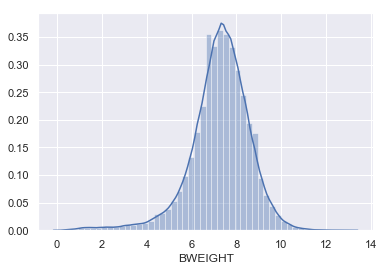

In [4]:
sns.distplot(df_train['BWEIGHT'])


### TASK 5: Present the skewness and kurtosis of the BWEIGHT target variable

Skewness: -3.558541
Kurtosis: 24.020191


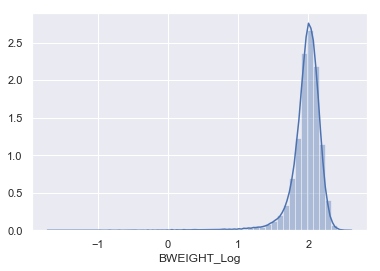

In [5]:
df_train['BWEIGHT_Log']= np.log(df_train['BWEIGHT'])

sns.distplot(df_train['BWEIGHT_Log'])

print("Skewness: %f" % df_train['BWEIGHT_Log'].skew())
print("Kurtosis: %f" % df_train['BWEIGHT_Log'].kurt())



### TASK 6: Do variable selection from the pool of 124 variables based on correlation score with the target variable BWEIGHT 

I am choosing 11 variables as my training variables as they have a correlation score above 0.09.
These variables are - WEEKS, GAINED, VISITS, HYPERPR, MARITAL, SEX, CIGNUM, RACEDAD, RACEMOM, PRETERM and MAGE

BWEIGHT        1.000000
BWEIGHT_Log    0.948247
WEEKS          0.565376
GAINED         0.173262
VISITS         0.129587
HYPERPR        0.108541
MARITAL        0.107106
SEX            0.093440
CIGNUM         0.090670
RACEDAD        0.084056
RACEMOM        0.079893
PRETERM        0.072932
MAGE           0.068473
ECLAMP         0.068073
PINFANT        0.067073
CERVIX         0.066935
MEDUC          0.055908
FEDUC          0.052673
FAGE           0.051447
HYDRAM         0.050001
HYPERCH        0.043561
UTERINE        0.042741
LOUTCOME       0.037264
BDEAD          0.036611
TERMS          0.026878
ANEMIA         0.011487
HEMOGLOB       0.010994
DIABETES       0.010216
DRINKNUM       0.010207
RENAL          0.007734
ACLUNG         0.006643
TOTALP         0.003201
ID             0.003001
RHSEN          0.001985
HERPES         0.001442
CARDIAC        0.000425
Name: BWEIGHT, dtype: float64


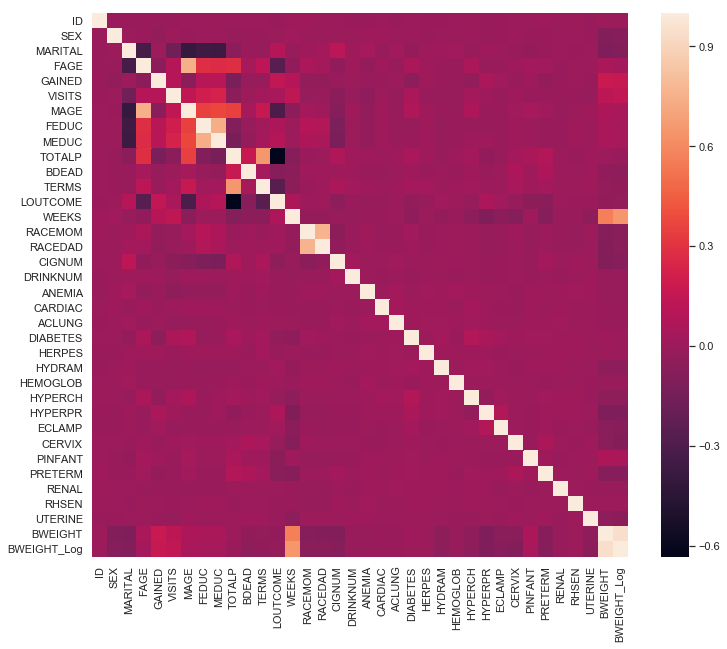

In [6]:
corr_matrix = df_train.corr()
corr_abs = corr_matrix.abs()

#set the figure size for heatmap 
plt.figure(figsize = (12,10))

#plot heatmap 
sns.heatmap(corr_matrix, xticklabels = corr_matrix.columns.values, yticklabels=corr_matrix.columns.values)

print(corr_abs['BWEIGHT'].sort_values(ascending=False))

#from pandas.tools.plotting import scatter_matrix
#attributes = ["BWEIGHT", "WEEKS", "GAINED", "VISITS", "HYPERPR","MARITAL", "SEX", "CIGNUM", "RACEDAD", "RACEMOM"]
#scatter_matrix(df_train[attributes], figsize=(16,16))


### TASK 7: Check for missing data, and tackle it
* There is no missing data as from the info we see that all columns have eaqual number of elements
* Still I have used the imputer function to replace any empty value by meadian value.

In [7]:
df_train.info()
df_train_num1 = df_train.drop("HISPMOM", axis=1)
df_train_num2 = df_train_num1.drop("HISPDAD", axis=1)

from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = "median")
imputer.fit(df_train_num2)

df_train_num2.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101400 entries, 0 to 101399
Data columns (total 38 columns):
ID             101400 non-null int64
SEX            101400 non-null int64
MARITAL        101400 non-null int64
FAGE           101400 non-null int64
GAINED         101400 non-null int64
VISITS         101400 non-null int64
MAGE           101400 non-null int64
FEDUC          101400 non-null int64
MEDUC          101400 non-null int64
TOTALP         101400 non-null int64
BDEAD          101400 non-null int64
TERMS          101400 non-null int64
LOUTCOME       101400 non-null int64
WEEKS          101400 non-null int64
RACEMOM        101400 non-null int64
RACEDAD        101400 non-null int64
HISPMOM        101400 non-null object
HISPDAD        101400 non-null object
CIGNUM         101400 non-null int64
DRINKNUM       101400 non-null int64
ANEMIA         101400 non-null int64
CARDIAC        101400 non-null int64
ACLUNG         101400 non-null int64
DIABETES       101400 non-null int64

<bound method NDFrame.head of             ID  SEX  MARITAL  FAGE  GAINED  VISITS  MAGE  FEDUC  MEDUC  \
0         2001    2        1    33      26      10    34     12      4   
1         2002    2        2    19      40      10    18     11     12   
2         2003    2        1    33      16      14    31     16     16   
3         2004    1        1    25      40      15    28     12     12   
4         2005    1        2    21      60      13    20     12     14   
5         2006    1        1    21      30      15    21     12     13   
6         2007    1        2    29      20      11    32      6      6   
7         2008    2        2    23      41      15    21     13     13   
8         2009    2        1    27       0      12    26     10     13   
9         2010    1        1    30      30      10    22     12     14   
10        2011    2        2    29      15      22    29     13     14   
11        2012    1        2    23      30      13    23     12     13   
12      

### TASK 8: Tackle the dummy categorical variables by introducing dummy variables

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df_train_dum = df_train["HISPMOM"]
df_train_dum_encoded = encoder.fit_transform(df_train_dum)

df_train_dum1 = df_train["HISPDAD"]
df_train_dum1_encoded = encoder.fit_transform(df_train_dum1)

df_train['HISPMOM'] = df_train_dum_encoded
df_train['HISPDAD'] = df_train_dum1_encoded
df_train.shape

(101400, 38)

### TASK 9.1: Randomly split the dataset into training, Tr (80%) and testing, Te (20%)

In [9]:
train_set, test_set = train_test_split(df_train, test_size=0.20)

print(train_set.shape)
print(test_set.shape)

corr_matrix = df_train.corr()
corr_abs = corr_matrix.abs()
print(corr_abs['BWEIGHT'].sort_values(ascending=False))

(81120, 38)
(20280, 38)
BWEIGHT        1.000000
BWEIGHT_Log    0.948247
WEEKS          0.565376
GAINED         0.173262
VISITS         0.129587
HYPERPR        0.108541
MARITAL        0.107106
SEX            0.093440
CIGNUM         0.090670
RACEDAD        0.084056
RACEMOM        0.079893
PRETERM        0.072932
MAGE           0.068473
ECLAMP         0.068073
PINFANT        0.067073
CERVIX         0.066935
MEDUC          0.055908
FEDUC          0.052673
FAGE           0.051447
HYDRAM         0.050001
HYPERCH        0.043561
UTERINE        0.042741
LOUTCOME       0.037264
BDEAD          0.036611
TERMS          0.026878
HISPMOM        0.015853
HISPDAD        0.014481
ANEMIA         0.011487
HEMOGLOB       0.010994
DIABETES       0.010216
DRINKNUM       0.010207
RENAL          0.007734
ACLUNG         0.006643
TOTALP         0.003201
ID             0.003001
RHSEN          0.001985
HERPES         0.001442
CARDIAC        0.000425
Name: BWEIGHT, dtype: float64


### TASK 9.2: On the training dataset, apply a normalization technique

In [10]:
def minMax(train_set):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    scaler.fit(train_set)
    scaler.transform(train_set)
    return train_set

def standarize(train_set):
    from sklearn.preprocessing import StandardScaler
    standardscaler = StandardScaler()
    standardscaler.fit(train_set)
    standardscaler.transform(train_set)
    return train_set

In [11]:
#train_set = standarize(train_set)

train_set = minMax(train_set)


xtrain_set = train_set[["WEEKS", "GAINED", "VISITS", "HYPERPR", "MARITAL", "SEX", "CIGNUM", "RACEDAD", "RACEMOM", "PRETERM", "MAGE"]]
ytrain_set = train_set[["BWEIGHT"]]



C:\Users\khare\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\khare\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


### TASK 9.3: Apply the training data statistics to normalize the testing data as well.

In [1]:
#test_set = standarize(test_set)

test_set = minMax(test_set)

xtest_set = test_set[["WEEKS", "GAINED", "VISITS", "HYPERPR", "MARITAL", "SEX", "CIGNUM", "RACEDAD", "RACEMOM", "PRETERM", "MAGE"]]
ytest_set = test_set[["BWEIGHT"]]


NameError: name 'standarize' is not defined

### TASK 10: Find the linear regression function describing the training dataset using Gradient Descent (batch or stochastic or mini-batch).

In [13]:
#converts pandas Dataframe to numpy.ndarray
X = xtrain_set.iloc[:,:]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)
y = ytrain_set.iloc[:,:].values 

#select initial weights. Taking all zeros to start with
weight = np.zeros([1,X.shape[1]])

#set learning rate and number of iterations
alpha = 0.00055
iters = 20000

# Print shapes of X, y and theta to make sure their dimensions are correct 
print(X.shape) ; 
print(y.shape) ;
print(weight.shape);

#computeLost
def computeLoss(X,y,weight):
    
    h = X@weight.T    # '@' for matrix multiplication. Alternatively matmult() can be used
    error = h-y    
    loss = np.power(error,2)
    J = np.sum(loss)/(2*len(X))
    return J

print(computeLoss(X,y,weight))

#gradient descent
def gradientDescent(X,y,weight,iters,alpha):
    loss = np.zeros(iters)
    for i in range(iters):
        y_hat = X@weight.T
        gradient = np.sum(X*(y_hat - y) ,  axis = 0)       
        weight = weight - (alpha/len(X))*gradient 
        loss[i] = computeLoss(X, y, weight) 
        
        # print cost after every 100 iterations to keep a track of when the cost function converges
        if i%100 == 0:
            print("Iteration %d | loss: %f" % (i, loss[i]))
            
    return weight,loss

#running the gd and cost function
W,loss = gradientDescent(X,y,weight,iters,alpha)
print("Weigths for the linear model", W)

finalCost = computeLoss(X,y,W)
print(finalCost)

(81120, 12)
(81120, 1)
(1, 12)
27.21736687353612
Iteration 0 | loss: 21.194255
Iteration 100 | loss: 0.633305
Iteration 200 | loss: 0.619602
Iteration 300 | loss: 0.615479
Iteration 400 | loss: 0.613065
Iteration 500 | loss: 0.611314
Iteration 600 | loss: 0.609925
Iteration 700 | loss: 0.608762
Iteration 800 | loss: 0.607756
Iteration 900 | loss: 0.606861
Iteration 1000 | loss: 0.606051
Iteration 1100 | loss: 0.605305
Iteration 1200 | loss: 0.604610
Iteration 1300 | loss: 0.603955
Iteration 1400 | loss: 0.603333
Iteration 1500 | loss: 0.602739
Iteration 1600 | loss: 0.602168
Iteration 1700 | loss: 0.601618
Iteration 1800 | loss: 0.601086
Iteration 1900 | loss: 0.600571
Iteration 2000 | loss: 0.600071
Iteration 2100 | loss: 0.599585
Iteration 2200 | loss: 0.599113
Iteration 2300 | loss: 0.598652
Iteration 2400 | loss: 0.598204
Iteration 2500 | loss: 0.597767
Iteration 2600 | loss: 0.597341
Iteration 2700 | loss: 0.596926
Iteration 2800 | loss: 0.596521
Iteration 2900 | loss: 0.596126
It

### Task 11: Predict BWEIGHT target variable for each of the testing dataset using the regression line learned in Task 10, and report RMSE(testing) (Root Mean Squared Error)

In [14]:
# get all rows and columns of pandas dataframe xtest_set into numpy array X_test
X_test = xtest_set.iloc[:,:]

# make the first column all ones
ones = np.ones([X_test.shape[0],1])
X_test = np.concatenate((ones,X_test),axis=1)

#get all rows and columns of ytest_set into numpy array y_test
y_test = ytest_set.iloc[:,:].values 

print("shape of X_test: ", X_test.shape)
print("shape of W: ", W.shape)
print("shape of y_test: ", y_test.shape)


#err = y_test - np.matmul(X_test,W.T)  
def getRMSE(y_test,x_test,W):
    err = y_test - (x_test@W.T)  
    sq_err = err*err ; 
    mean_sqr_err = np.sum(sq_err, axis = 0 )/len(err)
    RMSE = math.sqrt(mean_sqr_err)
    return RMSE

rmse1 = getRMSE(y_test,X_test,W)
print("Root Mean Squared Error = ", rmse1)

shape of X_test:  (20280, 12)
shape of W:  (1, 12)
shape of y_test:  (20280, 1)
Root Mean Squared Error =  1.086356484150816


### Repeat TASK 10 additional four times : Run linear regression training again
### After each run, Report RMSE(testing)
* RMSE 1 = 1.089435890861352
* RMSE 2 = 1.0769502778804536
* RMSE 3 = 1.0751931372890815
* RMSE 4 = 1.0838836320175358
* RMSE 5 = 1.076509556436053
* RMSE 6 = 1.079073176421531
* RMSE 7 = 1.0830120696681553
* RMSE 8 = 1.0769365485793123
* RMSE 9 = 1.0819189516943706
* RMSE 10 = 1.083887357731135
* RMSE 11 = 1.0691456953936629
* RMSE 12 = 1.0798605679268696
* RMSE 13 = 1.0694789612837972
* RMSE 14 = 1.0821356386698318
* RMSE 15 = 1.086356484150816

In [21]:
rmseValues = np.array([1.089435890861352,1.0769502778804536,1.0751931372890815,1.0838836320175358,1.076509556436053])
rmseValues2 = np.array([1.079073176421531,1.0830120696681553,1.0769365485793123,1.0819189516943706,1.083887357731135])
rmseValues3 = np.array([1.0691456953936629,1.0798605679268696,1.0694789612837972,1.0821356386698318,1.086356484150816])

### Task 12: Finally, Report RMSE(testing) = Average(RMSE_test) $\pm$ Stdev(RMSE_test)
### Here Average(RMSE_test) = average of all the 5 RMSE(testing) scores you got above.
### And, stdev(RMSE_test) = standard deviation of all the 5 RMSE(testing) scores above.

In [23]:
avgRMSE = np.mean(rmseValues)
stdevRMSE = np.std(rmseValues)

avgRMSE2 = np.mean(rmseValues2)
avgRMSE3 = np.mean(rmseValues3)

RMSE_avg_set = np.array([rmseValues,rmseValues2,rmseValues3])

stdevRMSE2 = np.std(rmseValues2)
stdevRMSE3 = np.std(rmseValues3)

RMSE_stdev_set = np.array([stdevRMSE,stdevRMSE2,stdevRMSE3])

RMSE_testing1 = avgRMSE + stdevRMSE
RMSE_testing2 = avgRMSE -stdevRMSE

print("Average RMSE = ",avgRMSE)

print("RMSE_testing1 = ",RMSE_testing1)
print("RMSE_testing2 = ",RMSE_testing2)


Average RMSE =  1.080394498896895
RMSE_testing1 =  1.0858338079982035
RMSE_testing2 =  1.0749551897955865


### Task 13: Run linear regression one last time on the whole dataset  (i.e, training+testing which is preprocessed by you above).

In [17]:
#df_train = minMax(df_train)
df_train = standarize(df_train)

x_full_set = df_train[["WEEKS", "GAINED", "VISITS", "HYPERPR", "MARITAL", "SEX", "CIGNUM", "RACEDAD", "RACEMOM", "PRETERM", "MAGE"]]
y_full_set = df_train[["BWEIGHT"]]

print(x_full_set.shape)

X_full = x_full_set.iloc[:,:]
ones = np.ones([X_full.shape[0],1])
X_full = np.concatenate((ones,X_full),axis=1)

y_full = y_full_set.iloc[:,:].values #.converts pandas Dataframe to numpy.ndarray

#select initial weights. Taking all zeros to start with
weight = np.zeros([1,X_full.shape[1]])

W_new,loss_new = gradientDescent(X_full,y_full,weight,iters,alpha)
print("Weigths for the linear model", W)

C:\Users\khare\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\khare\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


(101400, 11)
Iteration 0 | loss: 21.225012
Iteration 100 | loss: 0.635923
Iteration 200 | loss: 0.622241
Iteration 300 | loss: 0.618138
Iteration 400 | loss: 0.615738
Iteration 500 | loss: 0.613996
Iteration 600 | loss: 0.612608
Iteration 700 | loss: 0.611444
Iteration 800 | loss: 0.610432
Iteration 900 | loss: 0.609531
Iteration 1000 | loss: 0.608712
Iteration 1100 | loss: 0.607957
Iteration 1200 | loss: 0.607252
Iteration 1300 | loss: 0.606588
Iteration 1400 | loss: 0.605957
Iteration 1500 | loss: 0.605353
Iteration 1600 | loss: 0.604774
Iteration 1700 | loss: 0.604215
Iteration 1800 | loss: 0.603675
Iteration 1900 | loss: 0.603151
Iteration 2000 | loss: 0.602643
Iteration 2100 | loss: 0.602149
Iteration 2200 | loss: 0.601669
Iteration 2300 | loss: 0.601201
Iteration 2400 | loss: 0.600746
Iteration 2500 | loss: 0.600302
Iteration 2600 | loss: 0.599870
Iteration 2700 | loss: 0.599448
Iteration 2800 | loss: 0.599037
Iteration 2900 | loss: 0.598636
Iteration 3000 | loss: 0.598245
Iterat

### Task 14: Preprocess the judge-without-label.csv file according to the strategy applied above on the whole dataset (task 13)

In [18]:
#Reading the judge-without-label data
df_judge = pd.read_csv("judge-without-labels_2.csv")

xjudge_set = df_judge[["WEEKS", "GAINED", "VISITS", "HYPERPR", "MARITAL", "SEX", "CIGNUM", "RACEDAD", "RACEMOM", "PRETERM", "MAGE"]]

# get all rows and columns of pandas dataframe xtest_set into numpy array X_test
X_Judge = xjudge_set.iloc[:,:]

# make the first column all ones
ones = np.ones([X_Judge.shape[0],1])
X_Judge = np.concatenate((ones,X_Judge),axis=1)

X_Judge = standarize(X_Judge)
#X_Judge = minMax(X_Judge)

### Task 15: Predict BWEIGHT for each of the samples from the judge-without-label.csv file

In [19]:
print("shape of X_test: ", X_Judge.shape)
print("shape of W: ", W.shape)

BWEIGHT_PREDICION =  (X_Judge@W.T)  

print(BWEIGHT_PREDICION.shape)

dataset = pd.DataFrame({'BWEIGHT':BWEIGHT_PREDICION[:,0]})

dataset.to_csv('BWEIGHT_PREDICTION.csv', sep=',')

print(BWEIGHT_PREDICION.shape)

shape of X_test:  (2001, 12)
shape of W:  (1, 12)
(2001, 1)
(2001, 1)


### Task 16: Repeat tasks 9-12 three times, and report the ultimate RMSE_test average $\pm$ ultimate RMSE_test stdev

In [25]:
ultimate_test_avg = np.mean(RMSE_avg_set)
ultimate_test_stdev = np.mean(RMSE_stdev_set)

print("RMSE_test average + ultimate RMSE_test stdev = ",ultimate_test_avg+ultimate_test_stdev)
print("RMSE_test average - ultimate RMSE_test stdev = ",ultimate_test_avg-ultimate_test_stdev)


RMSE_test average + ultimate RMSE_test stdev =  1.0845678010094773
RMSE_test average - ultimate RMSE_test stdev =  1.0746025917910504




#Run1 RMSE = 1.07638
#Run2 RMSE = 1.06754
#Run3 RMSE = 1.05632
#Run4 RMSE = 1.05414
#Run5 RMSE = 1.05414
#Run6 RMSE = 1.06651
#Run7 RMSE = 1.06642
#Run8 RMSE = 1.06233

#Kaggle Handle ---> Shreya Dubey

